In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import sent_tokenize

In [19]:
df = pd.read_excel('data.xlsx', sheet_name='1번 문제')

In [20]:
df

,분류1,분류2,Ticket ID,Source,Created Date,Stars,Description,App version,OS version,Manufacturer,Device Model,User Type,Language-Country,Using Date
0,NaN,유료 구독에 대한 불만,622428,android_playstore,2022-11-30,3star,Ads over time have ended up with the app. If t...,5.42.07,12.0,Samsung,NaN,NaN,NaN,NaN
1,NaN,유료 구독에 대한 불만,622386,android_playstore,2022-11-30,2star,Seems like a great app and I would be happy to...,5.42.07,10.0,Huawei,NaN,NaN,NaN,NaN
2,NaN,유료 구독에 대한 불만,622367,android_playstore,2022-11-30,1star,It has new ads and a fee. You can't put a fee ...,5.43.03,12.0,Samsung,NaN,NaN,NaN,NaN
3,NaN,기능에 대한 불만 \n(소리 컨트롤),622332,android_playstore,2022-11-30,3star,"The only flaw of this app, is that the setting...",none,12.0,Redmi,NaN,NaN,NaN,NaN
4,NaN,기능에 대한 불만 \n(작동),622322,android_playstore,2022-11-30,1star,Very bad app can't ring on time last three day...,5.42.07,10.0,Samsung,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,NaN,NaN,616577,android_mail,2022-11-01,NaN,battery_opt:true // 꾀 높은 빈도로 스누즈 기능이 작동하지 않음 다...,5.33.20,12.0,Samsung,SM-S901N,premium,ko-KR,106.0
383,NaN,NaN,616573,android_mail,2022-11-01,NaN,battery_opt:false // The locked ringtones unde...,5.34.12,13.0,Google,Pixel 6 Pro,free,en-GB,151.0
384,NaN,NaN,616545,android_playstore,2022-11-01,1star,It's not smooth and freezes regularly,none,8.0,None,NaN,NaN,NaN,NaN
385,NaN,NaN,616527,android_playstore,2022-11-01,1star,rohit gupta,5.34.12,12.0,None,NaN,NaN,NaN,NaN


# 전처리

## Star => star 제거

In [22]:
df['Stars'] = df['Stars'].str.replace('star', '')
df

,분류1,분류2,Ticket ID,Source,Created Date,Stars,Description,App version,OS version,Manufacturer,Device Model,User Type,Language-Country,Using Date
0,NaN,유료 구독에 대한 불만,622428,android_playstore,2022-11-30,3,Ads over time have ended up with the app. If t...,5.42.07,12.0,Samsung,NaN,NaN,NaN,NaN
1,NaN,유료 구독에 대한 불만,622386,android_playstore,2022-11-30,2,Seems like a great app and I would be happy to...,5.42.07,10.0,Huawei,NaN,NaN,NaN,NaN
2,NaN,유료 구독에 대한 불만,622367,android_playstore,2022-11-30,1,It has new ads and a fee. You can't put a fee ...,5.43.03,12.0,Samsung,NaN,NaN,NaN,NaN
3,NaN,기능에 대한 불만 \n(소리 컨트롤),622332,android_playstore,2022-11-30,3,"The only flaw of this app, is that the setting...",none,12.0,Redmi,NaN,NaN,NaN,NaN
4,NaN,기능에 대한 불만 \n(작동),622322,android_playstore,2022-11-30,1,Very bad app can't ring on time last three day...,5.42.07,10.0,Samsung,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,NaN,NaN,616577,android_mail,2022-11-01,NaN,battery_opt:true // 꾀 높은 빈도로 스누즈 기능이 작동하지 않음 다...,5.33.20,12.0,Samsung,SM-S901N,premium,ko-KR,106.0
383,NaN,NaN,616573,android_mail,2022-11-01,NaN,battery_opt:false // The locked ringtones unde...,5.34.12,13.0,Google,Pixel 6 Pro,free,en-GB,151.0
384,NaN,NaN,616545,android_playstore,2022-11-01,1,It's not smooth and freezes regularly,none,8.0,None,NaN,NaN,NaN,NaN
385,NaN,NaN,616527,android_playstore,2022-11-01,1,rohit gupta,5.34.12,12.0,None,NaN,NaN,NaN,NaN


,분류1,분류2,Ticket ID,Source,Created Date,Stars,Description,App version,OS version,Manufacturer,Device Model,User Type,Language-Country,Using Date
0,NaN,유료 구독에 대한 불만,622428,android_playstore,2022-11-30,3,Ads over time have ended up with the app. If t...,5.42.07,12.0,Samsung,NaN,NaN,NaN,NaN
1,NaN,유료 구독에 대한 불만,622386,android_playstore,2022-11-30,2,Seems like a great app and I would be happy to...,5.42.07,10.0,Huawei,NaN,NaN,NaN,NaN
2,NaN,유료 구독에 대한 불만,622367,android_playstore,2022-11-30,1,It has new ads and a fee. You can't put a fee ...,5.43.03,12.0,Samsung,NaN,NaN,NaN,NaN
3,NaN,기능에 대한 불만 \n(소리 컨트롤),622332,android_playstore,2022-11-30,3,"The only flaw of this app, is that the setting...",none,12.0,Redmi,NaN,NaN,NaN,NaN
4,NaN,기능에 대한 불만 \n(작동),622322,android_playstore,2022-11-30,1,Very bad app can't ring on time last three day...,5.42.07,10.0,Samsung,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,NaN,NaN,616577,android_mail,2022-11-01,NaN,battery_opt:true // 꾀 높은 빈도로 스누즈 기능이 작동하지 않음 다...,5.33.20,12.0,Samsung,SM-S901N,premium,ko-KR,106.0
383,NaN,NaN,616573,android_mail,2022-11-01,NaN,battery_opt:false // The locked ringtones unde...,5.34.12,13.0,Google,Pixel 6 Pro,free,en-GB,151.0
384,NaN,NaN,616545,android_playstore,2022-11-01,1,It's not smooth and freezes regularly,none,8.0,None,NaN,NaN,NaN,NaN
385,NaN,NaN,616527,android_playstore,2022-11-01,1,rohit gupta,5.34.12,12.0,None,NaN,NaN,NaN,NaN


# EDA  

- EDA를 통해 전략 세우기  
(1) 조치 버전 우선순위 세우기

## 전체 데이터 확인  

* Non-null : Ticket ID, Source, Created Date, Description, App version, Manufacturer
* isnull : anothers

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   분류1               30 non-null     float64       
 1   분류2               329 non-null    object        
 2   Ticket ID         387 non-null    int64         
 3   Source            387 non-null    object        
 4   Created Date      387 non-null    datetime64[ns]
 5   Stars             203 non-null    object        
 6   Description       387 non-null    object        
 7   App version       387 non-null    object        
 8   OS version        381 non-null    float64       
 9   Manufacturer      387 non-null    object        
 10  Device Model      184 non-null    object        
 11  User Type         184 non-null    object        
 12  Language-Country  218 non-null    object        
 13  Using Date        184 non-null    float64       
dtypes: datetime64[ns](1), floa

## Ticket-ID  

* Ticket-ID : 고유 ID, 중복 없으므로 Primary Key로 사용 가능

In [36]:
len(df['Ticket ID'].unique())

387

## Source

인입 source 는 총 두 가지  
(1) 메일 : star 없음, 184개  
(2) 플레이스토어 : star가 무조건 있음, 203개  

In [33]:
df_mail = df[df['Source'] == 'android_mail']
df_app = df[df['Source'] == 'android_playstore']

df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 386
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   분류1               17 non-null     float64       
 1   분류2               176 non-null    object        
 2   Ticket ID         203 non-null    int64         
 3   Source            203 non-null    object        
 4   Created Date      203 non-null    datetime64[ns]
 5   Stars             203 non-null    object        
 6   Description       203 non-null    object        
 7   App version       203 non-null    object        
 8   OS version        197 non-null    float64       
 9   Manufacturer      203 non-null    object        
 10  Device Model      0 non-null      object        
 11  User Type         0 non-null      object        
 12  Language-Country  34 non-null     object        
 13  Using Date        0 non-null      float64       
dtypes: datetime64[ns](1), floa

## Created Date

2022년 11월 1일 ~ 2022년 11월 30일, 총 한 달 간  
리뷰 작성일

In [38]:
df['Created Date'].unique(), len(df['Created Date'].unique())

(array(['2022-11-30T00:00:00.000000000', '2022-11-29T00:00:00.000000000',
        '2022-11-28T00:00:00.000000000', '2022-11-27T00:00:00.000000000',
        '2022-11-26T00:00:00.000000000', '2022-11-25T00:00:00.000000000',
        '2022-11-24T00:00:00.000000000', '2022-11-23T00:00:00.000000000',
        '2022-11-22T00:00:00.000000000', '2022-11-21T00:00:00.000000000',
        '2022-11-20T00:00:00.000000000', '2022-11-19T00:00:00.000000000',
        '2022-11-18T00:00:00.000000000', '2022-11-17T00:00:00.000000000',
        '2022-11-16T00:00:00.000000000', '2022-11-15T00:00:00.000000000',
        '2022-11-14T00:00:00.000000000', '2022-11-13T00:00:00.000000000',
        '2022-11-12T00:00:00.000000000', '2022-11-11T00:00:00.000000000',
        '2022-11-10T00:00:00.000000000', '2022-11-09T00:00:00.000000000',
        '2022-11-08T00:00:00.000000000', '2022-11-07T00:00:00.000000000',
        '2022-11-06T00:00:00.000000000', '2022-11-05T00:00:00.000000000',
        '2022-11-04T00:00:00.000000000

## Stars  

1점, 2점, 3점, 4점, 5점, NAN이 있으며

(1) 1점 : 95  
(2) 2점 : 38  
(3) 3점 : 35  
(4) 4점 : 18  
(5) 5점 : 17  
(6) Nan : 184

In [44]:
df_stars = df['Stars']
df_stars.unique(), df_stars.value_counts()

(array(['3', '2', '1', nan, '5', '4'], dtype=object),
 1    95
 2    38
 3    35
 4    18
 5    17
 Name: Stars, dtype: int64)

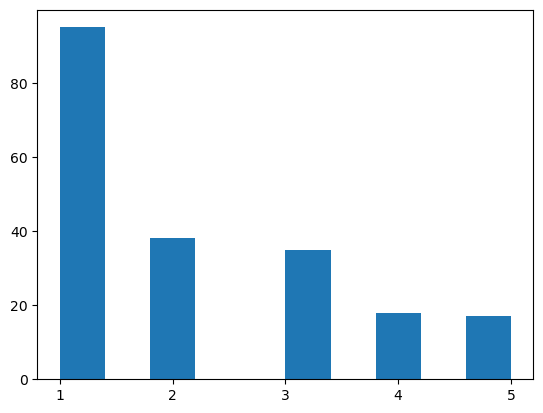

In [69]:
df_stars_dropna = df_stars.dropna().sort_values()
plt.hist(df_stars_dropna, )
plt.show()

## Description

In [73]:
df_description = df['Description']
df_description

0      Ads over time have ended up with the app. If t...
1      Seems like a great app and I would be happy to...
2      It has new ads and a fee. You can't put a fee ...
3      The only flaw of this app, is that the setting...
4      Very bad app can't ring on time last three day...
                             ...                        
382    battery_opt:true // 꾀 높은 빈도로 스누즈 기능이 작동하지 않음 다...
383    battery_opt:false // The locked ringtones unde...
384                It's not smooth and freezes regularly
385                                          rohit gupta
386    This app is really good but unfortunately many...
Name: Description, Length: 387, dtype: object

## App version

* 앱 버전은 34 종류  
* 앱 버전이 기록되지 않은 none 도 있음 (45개)  

In [79]:
df_appversion = df['App version']
df_appversion.unique(), len(df_appversion.unique())

(array(['5.42.07', '5.43.03', 'none', '4.64.05', '5.21.07', '5.34.12',
        '5.41.06', '5.12.11', '4.35.22', '44.53.16', '5.42.06', '4.52.08',
        '5.32.04', '4.81.03', '4.33.26', '5.12.06', '4.84.07', '5.27.05',
        '5.16.05', '5.42.05', '4.64.04', '4.86.05', '4.45.07', '5.35.09',
        '5.33.11', '4.27.5', '5.31.06', '5.33.20', '5.34.09', '5.21.08',
        '5.15.08', '5.24.53-beta', '45.24.01', '5.41.05'], dtype=object),
 34)

In [77]:
len(df[df['App version'] == 'none'])

45

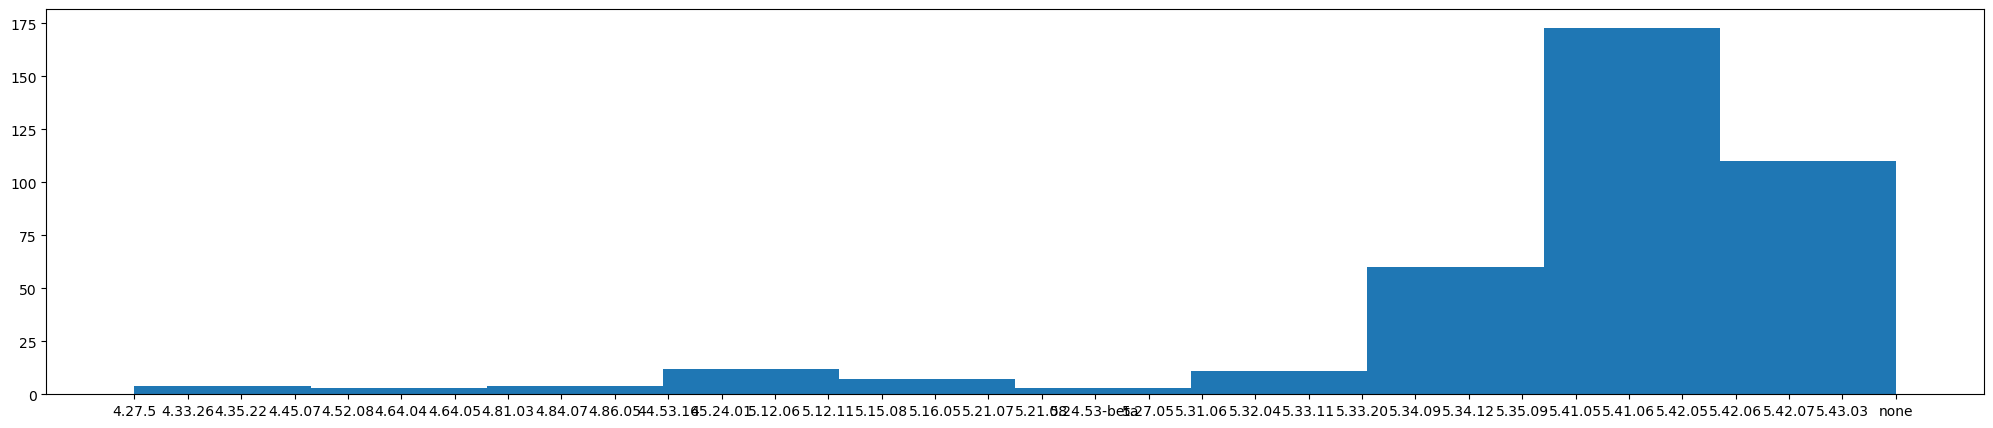

(4.27.5            1
 4.33.26           1
 4.35.22           1
 4.45.07           1
 4.52.08           1
 4.64.04           1
 4.64.05           1
 4.81.03           2
 4.84.07           1
 4.86.05           1
 44.53.16          8
 45.24.01          1
 5.12.06           1
 5.12.11           2
 5.15.08           1
 5.16.05           3
 5.21.07           3
 5.21.08           1
 5.24.53-beta      1
 5.27.05           1
 5.31.06           1
 5.32.04           5
 5.33.11           1
 5.33.20           4
 5.34.09           1
 5.34.12          50
 5.35.09           9
 5.41.05           3
 5.41.06         164
 5.42.05           6
 5.42.06          27
 5.42.07          37
 5.43.03           1
 none             45
 Name: App version, dtype: int64,
 None)

In [91]:
# 리뷰 앱 버전 분포  

plt.figure(figsize=(25,5))
plt.hist(df_appversion.sort_values())
df_appversion.value_counts().sort_index(), plt.show()

In [ ]:
# 